In [ ]:
from google.colab import files
uploaded_india = files.upload()

Saving India_data.xlsx to India_data.xlsx


In [ ]:
uploaded_kenya = files.upload()

Saving kenya_data.xlsx to kenya_data (1).xlsx


In [ ]:
uploaded_usa = files.upload()

Saving USA_data.xlsx to USA_data (2).xlsx


In [37]:
uploaded_india = "India_data.xlsx"
uploaded_kenya = "kenya_data.xlsx"
uploaded_usa = "USA_data.xlsx"

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import FastICA
from sklearn.manifold import LocallyLinearEmbedding

In [2]:
import pandas as pd

In [302]:
data = pd.read_excel('usa_division_values.xlsx','Sheet2')
data = data.set_index('Year')
data2 = 
# data = data.iloc[:,56:]

In [303]:
data

,ICA_1_2_3,ICA_4_5_6,ICA_7,ICA_8
Year,,,,
2001,0.453987,0.333159,0.283709,0.061873
2002,0.407963,0.330043,0.374906,0.099883
2003,0.360525,0.363602,0.408670,0.142396
2004,0.323544,0.418075,0.502727,0.193525
2005,0.311576,0.425213,0.615124,0.254146
2006,0.271031,0.488585,0.742549,0.319700
2007,0.323497,0.521781,0.926591,0.382764
2008,0.344861,0.424344,0.716010,0.405261
2009,0.565195,0.520063,0.733174,0.422524


In [304]:
norm = MinMaxScaler().fit(data)
X_train_norm = norm.transform(data)

In [305]:
normalized_data = pd.DataFrame(data=X_train_norm,columns=data.columns)
normalized_data['Year'] = data.index
normalized_data.set_index('Year',inplace=True)
normalized_data.head()

,ICA_1_2_3,ICA_4_5_6,ICA_7,ICA_8
Year,,,,
2001,0.367518,0.010814,0.205272,0.000000
2002,0.275067,0.000000,0.318009,0.051290
2003,0.179773,0.116437,0.359748,0.108656
2004,0.105487,0.305441,0.476021,0.177649
2005,0.081447,0.330207,0.614966,0.259451


In [306]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_train_norm)
PCA_df = pd.DataFrame(data = X_pca)
PCA_df

,0
0,-0.553313
1,-0.623558
2,-0.606579
3,-0.555994
4,-0.557741
5,-0.498234
6,-0.398398
7,-0.449832
8,-0.000347
9,0.023088


In [307]:
data.dtypes

ICA_1_2_3    float64
ICA_4_5_6    float64
ICA_7        float64
ICA_8        float64
dtype: object

In [308]:
X_centered = data - np.mean(data, axis=0)
n_samples = data.shape[0]
cov_matrix = np.dot(X_centered.T, X_centered) / n_samples
eigenvalues = pca.explained_variance_
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):    
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    print(eigenvalue)

0.08994194372168349
0.32851501870033895


In [309]:
variance = pca.explained_variance_ratio_ #calculate variance ratios
var=np.round(pca.explained_variance_ratio_, decimals=3)*100
var #cumulative sum of variance explained with [n] features

array([74.8])

In [310]:
df_comp = pd.DataFrame(abs( pca.components_ ),columns=data.columns)
df_comp = df_comp.T
df_comp = df_comp.sort_values(by=[0],ascending=False)
print(df_comp)

                  0
ICA_1_2_3  0.621737
ICA_8      0.515842
ICA_4_5_6  0.507769
ICA_7      0.299201


In [311]:
df_comp = df_comp[df_comp[0]>0.0]
df_comp

,0
ICA_1_2_3,0.621737
ICA_8,0.515842
ICA_4_5_6,0.507769
ICA_7,0.299201


In [312]:
pca_year=[]
for y in normalized_data.index:
  s=0
  for i in normalized_data.columns:
    if i in df_comp.index:
      s+=float(normalized_data.loc[y,i]*df_comp.loc[i])
  pca_year.append(s)

In [313]:
print(pca_year)

[0.29540756351115427, 0.29262531227733424, 0.3345804895063638, 0.4547433608077913, 0.5361413839819514, 0.6899092263067965, 0.9258886221381809, 0.7186797299278195, 1.180861703125954, 1.2648625285574473, 1.2496829982031665, 1.3641016796494454, 1.5050943139603281, 1.5279199899958678, 1.488258613122936, 1.5132976354074354, 1.6693640922514228]


In [314]:
ica = FastICA(n_components=1)
X_ica = ica.fit_transform(X_train_norm)

In [315]:
X_ica

array([[-2.41342321e-01],
       [-2.71981245e-01],
       [-2.64575459e-01],
       [-2.42511507e-01],
       [-2.43273479e-01],
       [-2.17318045e-01],
       [-1.73772098e-01],
       [-1.96206000e-01],
       [-1.51308472e-04],
       [ 1.00705809e-02],
       [ 5.94542275e-02],
       [ 1.61696967e-01],
       [ 2.59907805e-01],
       [ 3.05872878e-01],
       [ 3.20105819e-01],
       [ 3.43450650e-01],
       [ 3.90572535e-01]])

In [316]:
ica_comp = pd.DataFrame(abs( ica.components_ ),columns=data.columns)
ica_comp = ica_comp.T
ica_comp = ica_comp.sort_values(by=[0],ascending=False)

In [317]:
ica_comp

,0
ICA_1_2_3,0.271187
ICA_8,0.224998
ICA_4_5_6,0.221477
ICA_7,0.130504


In [318]:
ica_year=[]
for y in normalized_data.index:
  s=0
  for i in normalized_data.columns:
    if i in ica_comp.index:
      s+=float(normalized_data.loc[y,i]*ica_comp.loc[i])
  ica_year.append(s)

In [319]:
print(ica_year)

[0.1288498759680469, 0.127636322996929, 0.1459361908741229, 0.19834842730817306, 0.23385234286597056, 0.30092228236222984, 0.40385098033627626, 0.3134713037178293, 0.515064279921359, 0.5517034770001865, 0.5450825205827032, 0.5949892756351134, 0.6564869679332982, 0.6664429944178912, 0.6491436286533234, 0.6600650650491017, 0.7281376064834073]


In [296]:
lle = LocallyLinearEmbedding(n_components=1)
X_lle = lle.fit_transform(X_train_norm)

In [297]:
X_lle

array([[-0.44837189],
       [-0.38920642],
       [-0.33554358],
       [-0.25487817],
       [-0.19927453],
       [-0.09953602],
       [ 0.01266692],
       [-0.12946725],
       [ 0.11582865],
       [ 0.16857384],
       [ 0.13251804],
       [ 0.18701417],
       [ 0.21707895],
       [ 0.23746838],
       [ 0.25757421],
       [ 0.26518319],
       [ 0.2623715 ]])

In [298]:
from matplotlib import pyplot as plt

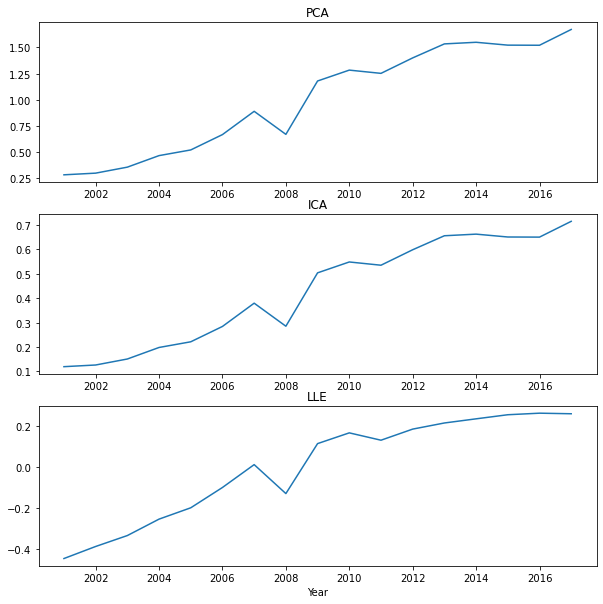

In [299]:
fig = plt.figure(figsize=(10,10))

plt.subplot(311)
plt.plot(normalized_data.index,pca_year)
plt.title("PCA")

plt.subplot(312)
plt.plot(normalized_data.index,ica_year)
plt.title("ICA")

plt.subplot(313)
plt.plot(normalized_data.index,X_lle)
plt.xlabel("Year")
plt.title("LLE")

# plt.savefig("india_graph.png")
plt.show()

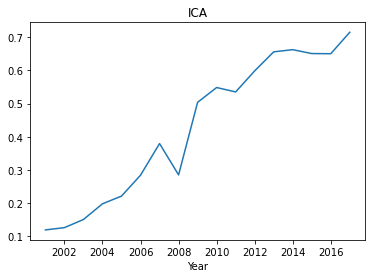

In [300]:
plt.plot(normalized_data.index,ica_year)
plt.xlabel("Year")
plt.title("ICA")
plt.show()

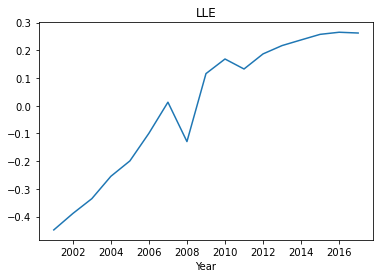

In [301]:
plt.plot(normalized_data.index,X_lle)
plt.xlabel("Year")
plt.title("LLE")
plt.show()